In [252]:
import pandas as pd
import numpy as np


In [253]:
odi=pd.read_csv('originalDatasetODI.csv')
odi=odi.dropna()
odi=odi[(odi['Team 1']=='India') | (odi['Team 2']=='India')]
cpy= odi[odi['Team 1']!='India']['Team 1'].tolist()

odi.reset_index(inplace=True)
odi=odi.drop('index',axis=1)
pos=0
for i in range(len(odi)):
    if(odi.loc[i]['Team 2']=='India'):
        odi.loc[i]['Team 2']=cpy[pos]
        pos=pos+1
        
odi['Team 1']='India' 
odi['win']=odi.Winner.map({'India':1})
odi['win'].fillna(0,inplace=True)
odimatches=odi.groupby('Team 2')['win'].count()
odiwon=odi.groupby('Team 2')['win'].sum()
df1=pd.DataFrame([odimatches,odiwon])
df1=df1.transpose()
df1.columns=['odimatches','odiwon']
df1=df1.loc[['Australia', 'England', 'New Zealand', 'Pakistan', 'South Africa',
       'Sri Lanka', 'West Indies']]
df1['percent win']=(df1['odiwon']/df1['odimatches'])*100
df1

,odimatches,odiwon,percent win
Team 2,,,
Australia,118.0,45.0,38.135593
England,91.0,52.0,57.142857
New Zealand,95.0,51.0,53.684211
Pakistan,123.0,51.0,41.463415
South Africa,74.0,29.0,39.189189
Sri Lanka,142.0,88.0,61.971831
West Indies,117.0,56.0,47.863248


In [280]:
test=pd.read_csv('testSeries.csv')
test=test.dropna()
test.head()

,Team,Opponent,Date,Matches,Result,Won,Lost,Drawn
0,Australia,England,15/03/1877,2,Drawn,1,1,0
1,Australia,England,02/01/1879,1,Won,1,0,0
2,England,Australia,06/09/1880,1,Won,1,0,0
3,Australia,England,31/12/1881,4,Won,2,0,2
4,England,Australia,28/08/1882,1,Lost,0,1,0


In [255]:
test=test[test['Team']=='India']
test.reset_index(inplace=True)
test.drop(test.index[:17],inplace=True)
test.drop(test.index[len(test)-1],inplace=True)
test.reset_index(inplace=True)
tmatches=test.groupby('Opponent')['Matches'].sum()
twon=test.groupby('Opponent')['Won'].sum()
df2=pd.DataFrame([tmatches,twon])
df2=df2.transpose()
df2['percent win']=(df2['Won']/df2['Matches'])*100
df2

,Matches,Won,percent win
Opponent,,,
Australia,34,18,52.941176
England,37,14,37.837838
New Zealand,22,12,54.545455
Pakistan,22,5,22.727273
South Africa,16,8,50.000000
Sri Lanka,20,11,55.000000
West Indies,32,11,34.375000


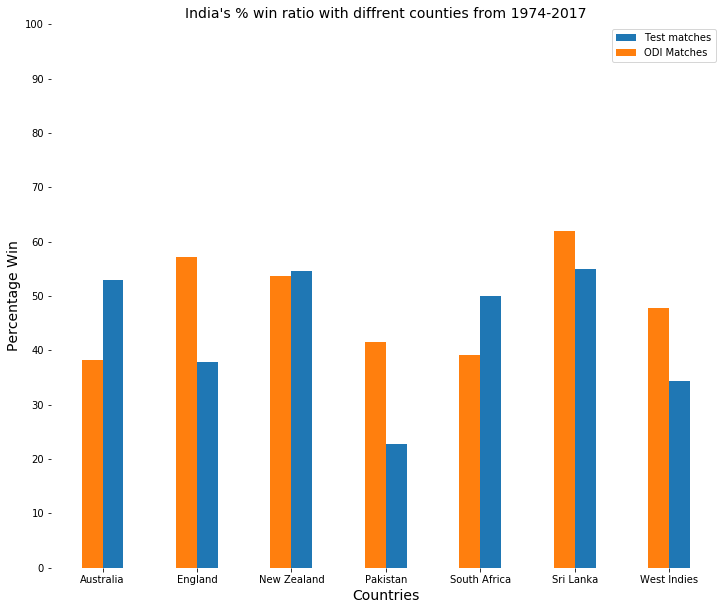

In [281]:
import  matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.bar([x*1.8 for x in range(len(df2))],df2['percent win'],width=0.4,label='Test matches')
plt.bar([x*1.8-0.4 for x in range(len(df2))],df1['percent win'],width=0.4,label='ODI Matches')
plt.xticks([x*1.8-0.2 for x in range(len(df2))],df2.index)
plt.yticks([x*10 for x in range(11) ],[x*10 for x in range(11) ])
plt.xlabel('Countries',fontsize=14)
plt.ylabel("Percentage Win",fontsize=14)
plt.legend()
plt.title("India's % win ratio with diffrent counties from 1974-2017",fontsize=14)
for i in plt.gca().spines:
    plt.gca().spines[i].set_visible(False)
plt.savefig('fig.png')    
plt.show()